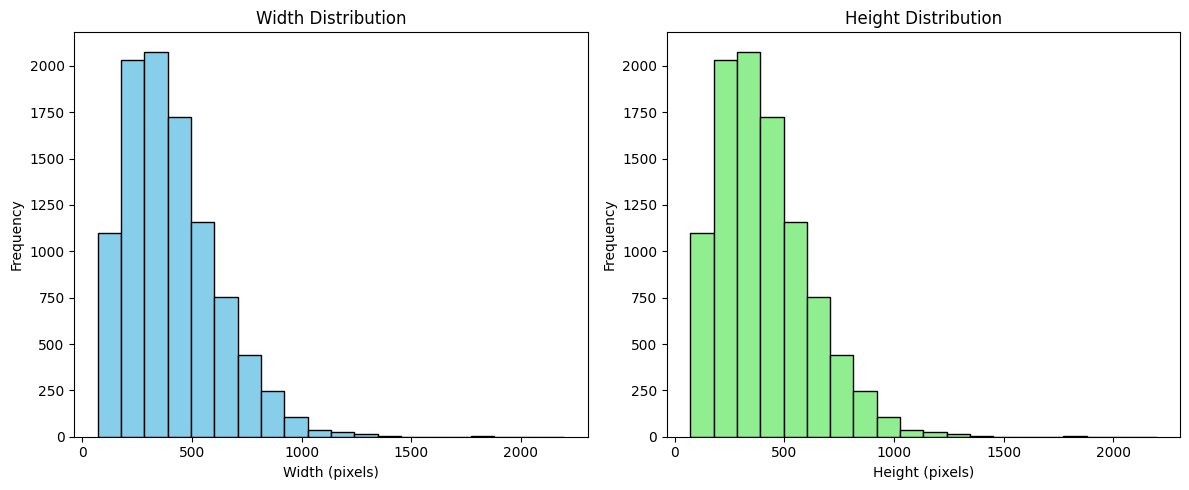

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# CSV 경로 및 이미지 디렉토리
csv_path = "/data/alc_jihan/split_index/merged_data.csv"
image_dir = "/data/alc_jihan/silence_black_without_edge_imgae"

# 분석 대상 Task
target_tasks = {"read_command", "address", "tongue_twister", "number"}

# CSV 파일 로드
df = pd.read_csv(csv_path)

# 대상 Task 필터링
filtered_df = df[df["Task"].isin(target_tasks)]

# 이미지 파일 이름 추출
valid_filenames = set(filtered_df["FileName"].tolist())

# 이미지 크기 저장 리스트
heights, widths = [], []

# 이미지 디렉토리 순회
for fname in os.listdir(image_dir):
    file_id, ext = os.path.splitext(fname)
    if ext.lower() != ".png":
        continue
    if file_id not in valid_filenames:
        continue

    img_path = os.path.join(image_dir, fname)
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    except Exception as e:
        print(f"Failed to load image: {img_path} ({e})")

# 시각화: 이미지 크기 분포
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.title("Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='lightgreen', edgecolor='black')
plt.title("Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
